In [176]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [264]:
dataset1=pd.read_csv('../datasets/kidney-stone-dataset.csv')
dataset1 = dataset1.drop('Unnamed: 0', axis=1)
dataset1

,gravity,ph,osmo,cond,urea,calc,target
0,1.021000,4.910000,725,14.000000,443,2.450000,0
1,1.017000,5.740000,577,20.000000,296,4.490000,0
2,1.008000,7.200000,321,14.900000,101,2.360000,0
3,1.011000,5.510000,408,12.600000,224,2.150000,0
4,1.005000,6.520000,187,7.500000,91,1.160000,0
...,...,...,...,...,...,...,...
85,1.021452,5.556081,756,24.241481,367,7.669120,1
86,1.016501,6.900257,549,20.549790,204,5.775256,1
87,1.032754,5.443491,1085,23.188653,576,8.664169,1
88,1.023870,5.106433,325,12.124689,50,0.781620,1


In [265]:
dataset2=pd.read_csv('../datasets/kidney_stone_data.csv')
dataset2 = dataset2.drop('id', axis=1)
dataset2

,gravity,ph,osmo,cond,urea,calc,target
0,1.013,6.19,443,14.8,124,1.45,0
1,1.025,5.40,703,23.6,394,4.18,0
2,1.009,6.13,371,24.5,159,9.04,0
3,1.021,4.91,442,20.8,398,6.63,1
4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...
409,1.011,5.21,527,21.4,75,1.53,0
410,1.024,5.53,577,19.7,224,0.77,0
411,1.018,6.28,455,22.2,270,7.68,1
412,1.008,7.12,325,12.6,75,1.03,1


In [266]:
dataset3=pd.read_csv('../datasets/kindey stone urine analysis.csv')
dataset3

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1


In [267]:
combined_df=pd.concat([dataset1, dataset2,dataset3], ignore_index=True)
df=combined_df.copy()
df

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
578,1.025,7.90,721,23.6,301,9.04,1
579,1.017,4.81,410,13.3,195,0.58,1
580,1.024,5.40,803,21.8,394,7.82,1
581,1.016,6.81,594,21.4,255,12.20,1


In [268]:
df.shape

(583, 7)

In [269]:
df.isnull().sum()

gravity    0
ph         0
osmo       0
cond       0
urea       0
calc       0
target     0
dtype: int64

In [270]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 583 entries, 0 to 582
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   gravity  583 non-null    float64
 1   ph       583 non-null    float64
 2   osmo     583 non-null    int64  
 3   cond     583 non-null    float64
 4   urea     583 non-null    int64  
 5   calc     583 non-null    float64
 6   target   583 non-null    int64  
dtypes: float64(4), int64(3)
memory usage: 32.0 KB


In [271]:
df.duplicated().sum()

77

In [272]:
df = df.drop_duplicates()

In [273]:
df.duplicated().sum()

0

<Axes: xlabel='target', ylabel='count'>

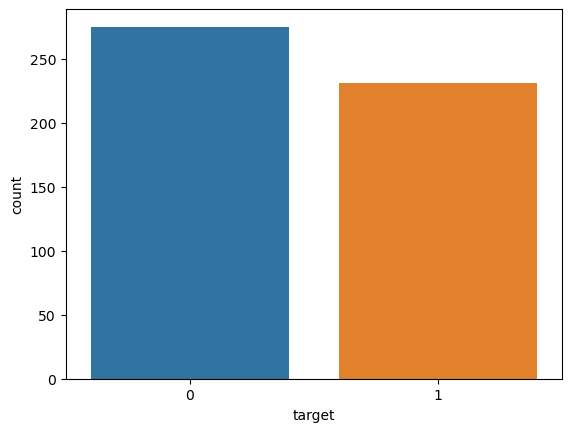

In [274]:
import seaborn as sns
sns.countplot(x='target',data=df)

<Axes: xlabel='gravity'>

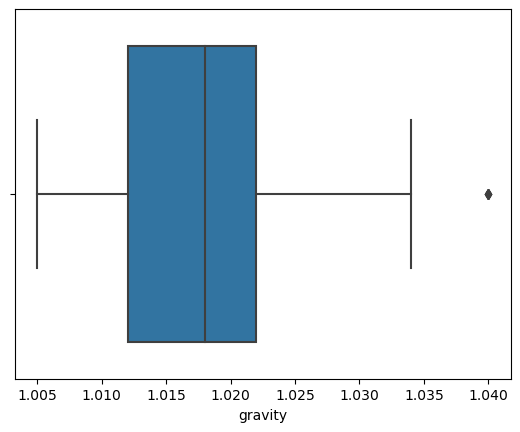

In [275]:
import seaborn as sns
sns.boxplot(data=combined_df, x='gravity')

<Axes: xlabel='ph'>

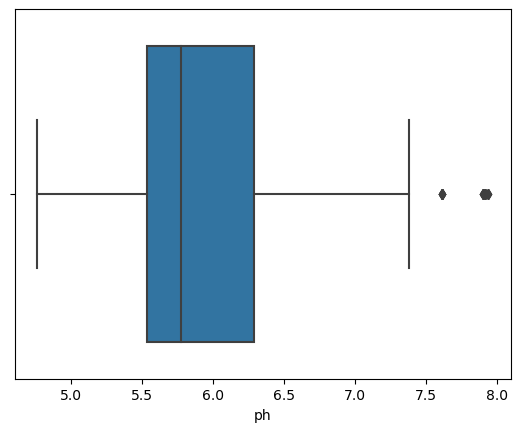

In [276]:
sns.boxplot(data=combined_df, x='ph')

<Axes: xlabel='osmo'>

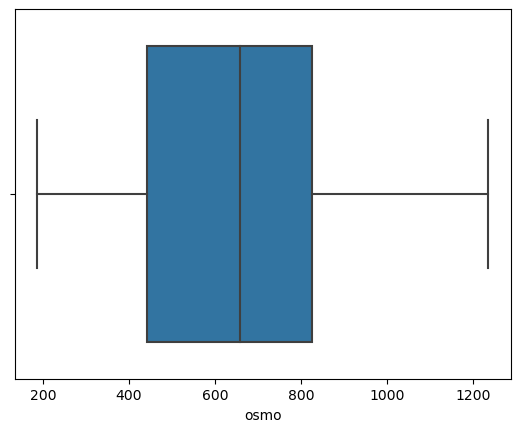

In [277]:
sns.boxplot(data=combined_df, x='osmo')

<Axes: xlabel='cond'>

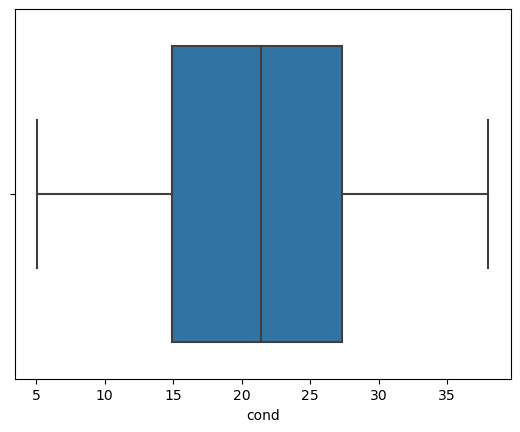

In [278]:
sns.boxplot(data=combined_df, x='cond')

<Axes: xlabel='urea'>

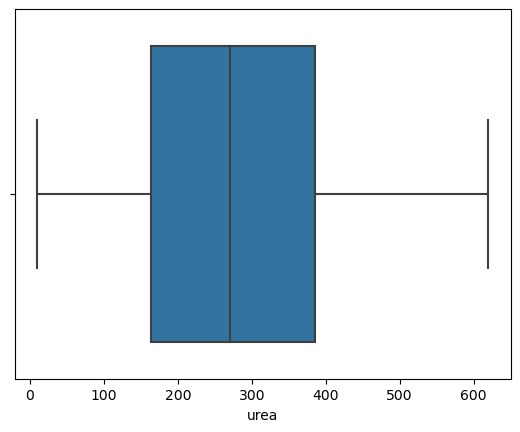

In [279]:
sns.boxplot(data=combined_df, x='urea')

<Axes: xlabel='calc'>

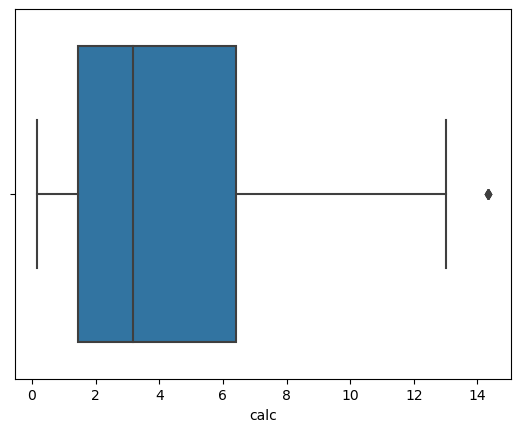

In [280]:
sns.boxplot(data=combined_df, x='calc')

# Handling outliers

In [281]:
columns = ['gravity', 'ph', 'calc']

In [282]:
for col in columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1

    # Define lower and upper whisker values
    lower_whisker = Q1 - 1.5 * IQR
    upper_whisker = Q3 + 1.5 * IQR

    # Cap the outliers at the whisker values
    df[col] = np.where(df[col] < lower_whisker, lower_whisker, 
                       np.where(df[col] > upper_whisker, upper_whisker, df[col]))


C:\Users\Dell\AppData\Local\Temp\ipykernel_8584\3935736073.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_whisker, lower_whisker,
C:\Users\Dell\AppData\Local\Temp\ipykernel_8584\3935736073.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[col] = np.where(df[col] < lower_whisker, lower_whisker,
C:\Users\Dell\AppData\Local\Temp\ipykernel_8584\3935736073.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .l

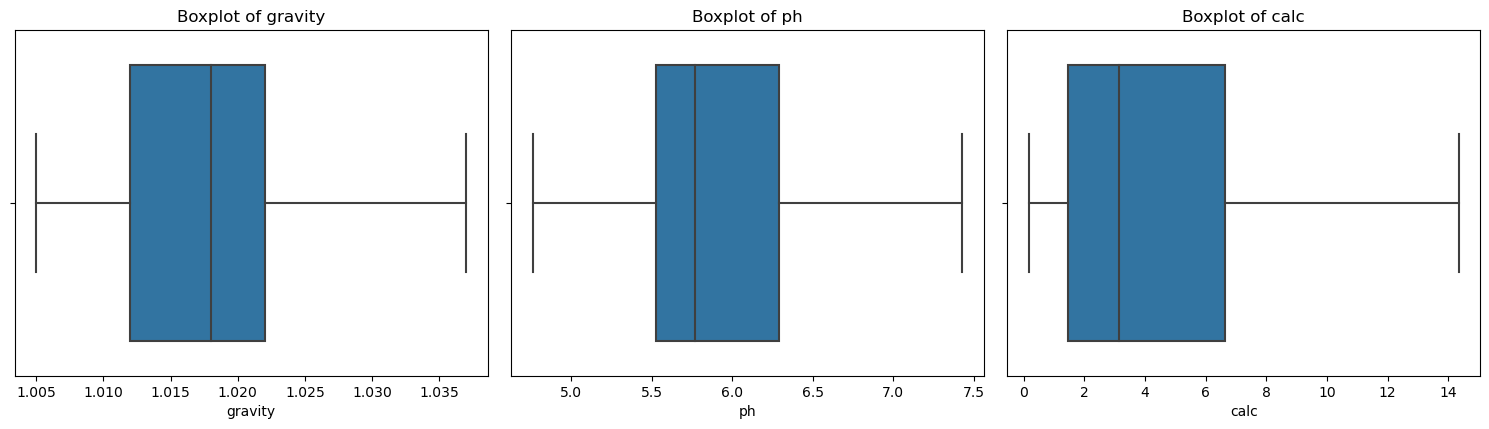

In [283]:
plt.figure(figsize=(15, 8))
for i, col in enumerate(columns, 1):
    plt.subplot(2, 3, i)  # Adjust the layout as needed
    sns.boxplot(data=df, x=col)
    plt.title(f'Boxplot of {col}')

plt.tight_layout()
plt.show()

# split

In [284]:
from sklearn.model_selection import train_test_split
X=df.drop(['target'],axis=1)
Y=df['target']

In [285]:
X

,gravity,ph,osmo,cond,urea,calc
0,1.021,4.91,725,14.0,443,2.45
1,1.017,5.74,577,20.0,296,4.49
2,1.008,7.20,321,14.9,101,2.36
3,1.011,5.51,408,12.6,224,2.15
4,1.005,6.52,187,7.5,91,1.16
...,...,...,...,...,...,...
501,1.018,6.28,455,22.2,270,7.68
502,1.008,7.12,325,12.6,75,1.03
503,1.011,6.13,364,9.9,159,0.27
554,1.026,5.16,822,26.0,301,14.34


In [286]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Flatten, Dense, MaxPooling1D, Dropout
from tensorflow.keras.layers import BatchNormalization, GaussianNoise
from tensorflow.keras.layers import GlobalMaxPooling1D
from tensorflow.keras.regularizers import l2

In [287]:
# Normalize the features
scaler = StandardScaler()
X = scaler.fit_transform(X)

In [288]:
# Reshape X for Conv1D input: (samples, timesteps, features)
X = X.reshape((X.shape[0], X.shape[1], 1))  # timesteps=1 since data is independent

In [289]:
X

array([[[ 0.45834955],
        [-1.67960194],
        [ 0.34612912],
        [-0.9683741 ],
        [ 1.229403  ],
        [-0.52235257]],

       [[-0.14080979],
        [-0.34840527],
        [-0.28240913],
        [-0.17110158],
        [ 0.15064244],
        [ 0.11350281]],

       [[-1.4889183 ],
        [ 1.99321779],
        [-1.36961042],
        [-0.84878322],
        [-1.28036647],
        [-0.55040501]],

       ...,

       [[-1.0395488 ],
        [ 0.27709678],
        [-1.18699458],
        [-1.513177  ],
        [-0.85473305],
        [-1.20184508]],

       [[ 1.20729872],
        [-1.27863908],
        [ 0.75807648],
        [ 0.62617095],
        [ 0.18733498],
        [ 3.18368684]],

       [[ 2.85498689],
        [ 0.51767449],
        [ 0.82602656],
        [-0.92851048],
        [ 1.54495881],
        [ 1.29482235]]])

In [290]:
print(X.shape)

(506, 6, 1)


The Conv1D layer is designed for processing sequential or temporal data (e.g., time series or signals) where each sample consists of multiple timesteps and features. It requires the input to have three dimensions:

Samples: Number of data points or observations in the dataset (e.g., rows of your dataset).
Timesteps: Number of time steps or sequential components per sample (e.g., 1 if each sample is treated as independent).
Features: Number of features for each timestep (e.g., the number of columns in your dataset excluding the target column)

Why Do This?
Reshaping is necessary because:

Conv1D Input Format: Conv1D expects a 3D shape (samples, timesteps, features).
Sliding Kernels: Conv1D applies kernels (filters) along the time axis (timesteps). In your case, since there are no true timesteps, you treat each row as having 1 timestep and use the 6 features as input for that timestep.

In [291]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

# CNN model

In [309]:
model = Sequential([
    Conv1D(filters=32, kernel_size=2, activation='relu', input_shape=(X.shape[1], 1),
           padding='same', kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularization
    Dropout(0.2),

    Conv1D(filters=64, kernel_size=2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularization
    Dropout(0.3),

    Conv1D(filters=128, kernel_size=2, activation='relu', padding='same', kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularization
    Dropout(0.4),

    Flatten(),
    Dense(128, activation='relu', kernel_regularizer=regularizers.l2(0.01)),  # L2 Regularization
    Dropout(0.5),
    Dense(1, activation='sigmoid')  # Sigmoid for binary classification
])

NameError: name 'regularizers' is not defined

In [310]:
model.summary()

Model: "sequential_22"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv1d_48 (Conv1D)                   │ (None, 6, 32)               │              96 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_26 (MaxPooling1D)      │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_58 (Dropout)                 │ (None, 6, 32)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_49 (Conv1D)                   │ (None, 6, 64)               │           4,160 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_27 (MaxPooling1D)      │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_59 (Dropout)                 │ (None, 6, 64)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv1d_50 (Conv1D)                   │ (None, 6, 128)              │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling1d_28 (MaxPooling1D)      │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_60 (Dropout)                 │ (None, 6, 128)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten_16 (Flatten)                 │ (None, 768)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_42 (Dense)                     │ (None, 128)                 │          98,432 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_61 (Dropout)                 │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_43 (Dense)                     │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 357,989 (1.37 MB)

 Trainable params: 119,329 (466.13 KB)

 Non-trainable params: 0 (0.00 B)

 Optimizer params: 238,660 (932.27 KB)

In [311]:
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [312]:
# Compile the model
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [313]:
# Train the model
history = model.fit(
    X_train, y_train,
    validation_split=0.2,
    epochs=50,
    batch_size=16,
    callbacks=callbacks
)

Epoch 1/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 3s 26ms/step - accuracy: 0.7384 - loss: 0.6681 - val_accuracy: 0.7042 - val_loss: 0.8547 - learning_rate: 0.0010
Epoch 2/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7235 - loss: 0.7268 - val_accuracy: 0.6901 - val_loss: 0.7871 - learning_rate: 0.0010
Epoch 3/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7284 - loss: 0.7111 - val_accuracy: 0.7183 - val_loss: 0.8012 - learning_rate: 0.0010
Epoch 4/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7577 - loss: 0.6919 - val_accuracy: 0.7042 - val_loss: 0.7947 - learning_rate: 0.0010
Epoch 5/50
10/18 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.7346 - loss: 0.6667 
Epoch 5: ReduceLROnPlateau reducing learning rate to 0.0005000000237487257.
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 8ms/step - accuracy: 0.7344 - loss: 0.6727 - val_accuracy: 0.7042 - val_loss: 0.7864 - learning_rate: 0.0010
Epoch 6/50
18/18 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - accuracy: 0.7476 - loss: 0.6455 - val_accuracy:

In [314]:
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy * 100:.2f}%")

5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.7700 - loss: 0.6174 
Test Accuracy: 76.32%


# visualize training history

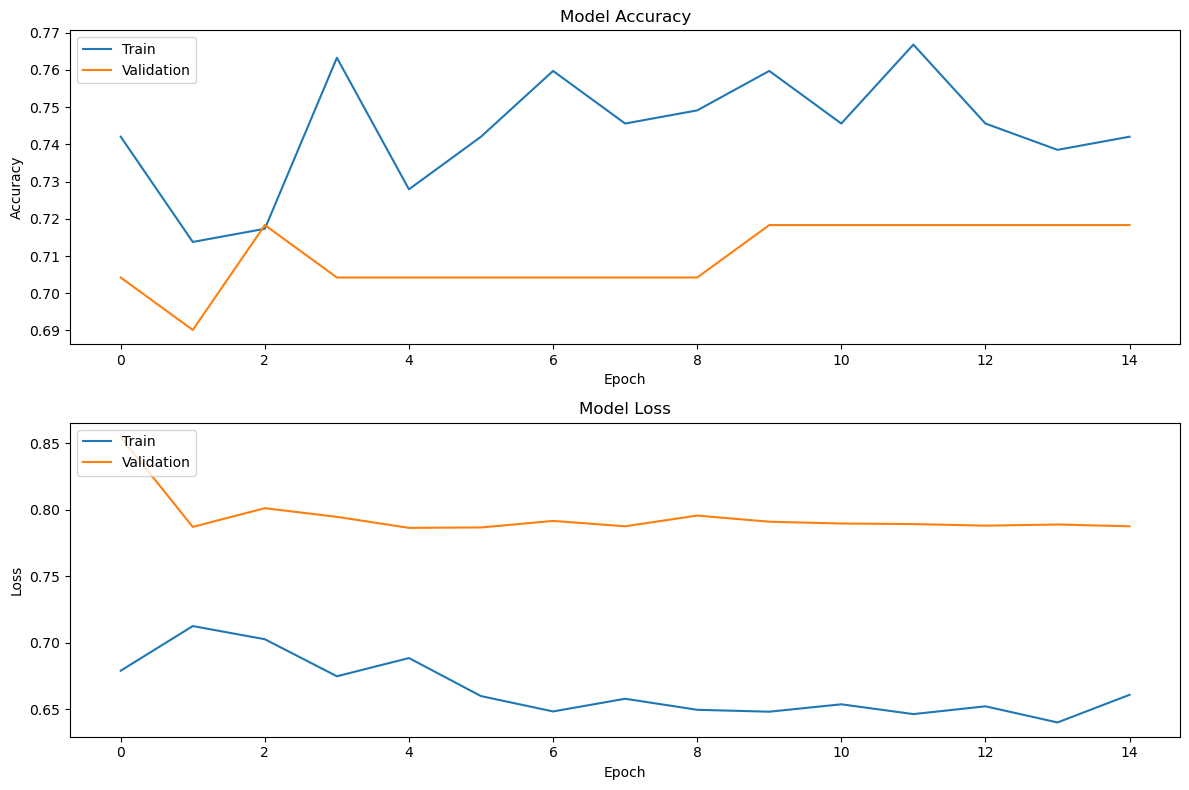

In [315]:
# Plotting the training history
plt.figure(figsize=(12, 8)) 

# Plot training & validation accuracy values
plt.subplot(2, 1, 1)  # 2 rows, 1 column, first subplot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Validation'], loc='upper left')

# Plot training & validation loss values
plt.subplot(2, 1, 2)  # 2 rows, 1 column, second subplot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.tight_layout()
plt.show()

In [316]:
# Get model predictions on the test set
y_pred = (model.predict(X_test) > 0.5).astype("int32")

1/5 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/stepWARNING:tensorflow:5 out of the last 15 calls to <function TensorFlowTrainer.make_predict_function.<locals>.one_step_on_data_distributed at 0x0000026A3485DC60> triggered tf.function retracing. Tracing is expensive and the excessive number of tracings could be due to (1) creating @tf.function repeatedly in a loop, (2) passing tensors with different shapes, (3) passing Python objects instead of tensors. For (1), please define your @tf.function outside of the loop. For (2), @tf.function has reduce_retracing=True option that can avoid unnecessary retracing. For (3), please refer to https://www.tensorflow.org/guide/function#controlling_retracing and https://www.tensorflow.org/api_docs/python/tf/function for  more details.
5/5 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step


In [317]:
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay

print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Classification Report:
              precision    recall  f1-score   support

           0       0.76      0.84      0.80        85
           1       0.76      0.67      0.71        67

    accuracy                           0.76       152
   macro avg       0.76      0.75      0.76       152
weighted avg       0.76      0.76      0.76       152



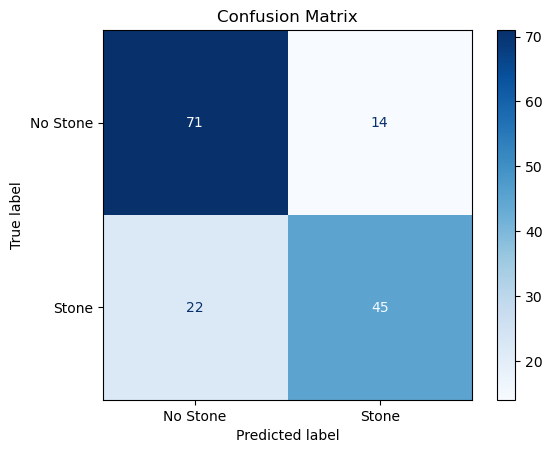

In [318]:
# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

# Display Confusion Matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Stone', 'Stone'])
disp.plot(cmap='Blues')
plt.title('Confusion Matrix')
plt.show()

# input prediction

In [43]:
gravity=float(input("Enter gravity: "))
ph=float(input("Enter ph: "))
osmo=float(input("Enter osmo: "))
cond=float(input("Enter cond: "))
urea=float(input("Enter urea: "))
calc=float(input("Enter calc: "))

Enter gravity: 1.021
Enter ph: 4.91
Enter osmo: 725
Enter cond: 14.0
Enter urea: 443
Enter calc: 2.45


In [44]:
input_data = pd.DataFrame({
        'gravity': [gravity],
        'osmo': [osmo],
        'ph': [ph],
        'cond': [cond],
        'urea': [urea],
        'calc': [calc]
    })

In [45]:
prediction = model_lgbm.predict(input_data)

In [46]:
print(prediction)

[0]


In [47]:
probability = model_lgbm.predict_proba(input_data)
print(probability)

[[0.51304657 0.48695343]]


In [48]:
print("probability no stone: ",probability[0][0])

probability no stone:  0.513046572016896


In [49]:
print("probability of stone: ",probability[0][1])

probability of stone:  0.48695342798310404


In [50]:
from joblib import dump, load
# Save the best model
dump(model_lgbm, 'lgbm.joblib')

['lgbm.joblib']

In [51]:
model= load('lgbm.joblib')

In [54]:
prob=model.predict_proba(input_data)

In [55]:
prob[0][0]

0.513046572016896

# Visualization

In [31]:
results_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': Y_pred_lgbm
})

In [34]:
# Create counts for Actual and Predicted
actual_counts = results_df['Actual'].value_counts().reset_index()
actual_counts.columns = ['Category', 'Count']
predicted_counts = results_df['Predicted'].value_counts().reset_index()
predicted_counts.columns = ['Category', 'Count']

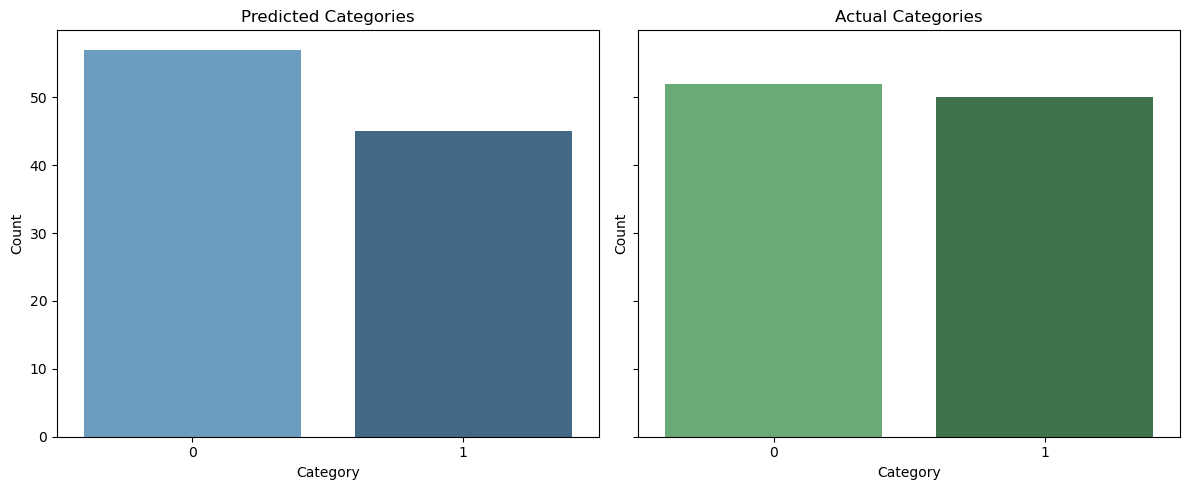

In [36]:
# Create side-by-side bar plots using Seaborn
fig, axes = plt.subplots(1, 2, figsize=(12, 5), sharey=True)

# Plot Predicted Categories
sns.barplot(data=predicted_counts, x='Category', y='Count', ax=axes[0], palette='Blues_d')
axes[0].set_title('Predicted Categories')
axes[0].set_xlabel('Category')
axes[0].set_ylabel('Count')

# Plot Actual Categories
sns.barplot(data=actual_counts, x='Category', y='Count', ax=axes[1], palette='Greens_d')
axes[1].set_title('Actual Categories')
axes[1].set_xlabel('Category')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plots
plt.show()

In [37]:
from sklearn.metrics import precision_score, recall_score, f1_score, confusion_matrix, classification_report
print('Precision:', precision_score(y_test, Y_pred_lgbm))
print('Recall:', recall_score(y_test, Y_pred_lgbm))
print('F1 Score:', f1_score(y_test, Y_pred_lgbm))
print('Classification report:', classification_report(y_test, Y_pred_lgbm))

Precision: 0.8444444444444444
Recall: 0.76
F1 Score: 0.8
Classification report:               precision    recall  f1-score   support

           0       0.79      0.87      0.83        52
           1       0.84      0.76      0.80        50

    accuracy                           0.81       102
   macro avg       0.82      0.81      0.81       102
weighted avg       0.82      0.81      0.81       102



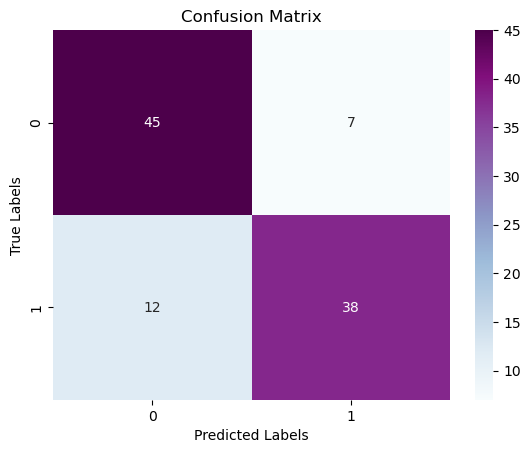

In [38]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_lgbm.predict(X_test))

sns.heatmap(cm, annot=True, fmt='d', cmap='BuPu')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')

plt.show()

In [39]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, model_lgbm.predict(X_test))

In [40]:
cm

array([[45,  7],
       [12, 38]], dtype=int64)